<div class="alert alert-block alert-info">
    This script <b> filters out chemicals that were not found in PubChem database <code>pubchem_match!=No match</code></b>.
    <hr> 
    Note: <br>
    <i><b>Input file(s)' name(s) and metadata</b></i> (if available) are <b>printed out (below 👇🏼) in 'read data to df' section.</b>

In [1]:
# %env
# %who_ls
# %who
# %who int
# %pinfo <var name>

# Imports

In [2]:
%config IPCompleter.use_jedi = False # disable jedi autocompleter (https://stackoverflow.com/a/65734178/14485040)

import project_path  # makes possible the access to `src` directory using relative path
from src.data import internal_funcs
from src.utils import explore_dir, make_readme_info
from src.utils import read_excel_to_pandas as r_excel
from src.utils import set_outputs_dir
from src.utils import write_pandas_to_excel as w_excel

%run init_nb.ipynb

In [3]:
pd.options.display.max_columns = None

# INPUTS: Identify file(s) and read data to df

In [4]:
# Explore the directory to find the file(s)
inputs_dir, files_list = explore_dir(
    path_to_dir=r"..\data\interim", file_extension="xlsx", print_files_list=True
)

['CPC33to36_other_chemicals.xlsx',
 'data-extended-added-transgression-pbs.xlsx',
 'data-extended-glo-markets-and-fu-kg.xlsx',
 'data-filtered-cpc-33to36-divisions.xlsx',
 'data-full-only-in-pubchem.xlsx',
 'data-regrouped-cpc-divisions-into-3-categories.xlsx',
 'df_chemproperties.xlsx',
 'extended-data-chosen-methods-metadata-pubchem-properties.xlsx',
 'highlighted-products.xlsx',
 'lcia-results-from-sp910-combined.xlsx',
 'list-chemicals-not-shown-on-fig-prices-vs-impacts.xlsx',
 'list-chemicals-not-shown-on-fig3.xlsx',
 'list-outliers.xlsx',
 'mapped-lcia-results.xlsx',
 'pubchem-properties.xlsx',
 'raw-data-chosen-lcia-methods-and-metadata.xlsx',
 'temp-df_base_full_wCAS.xlsx',
 'temp-df_base_full_wCAS_woOutliersRMDk9a5.xlsx',
 'temp-dict_fullMethods.xlsx',
 'to-check-regrouped-data-other-chemicals-category.xlsx']


In [5]:
# Read data
df_base_full = r_excel(inputs_dir, "data-extended-added-transgression-pbs.xlsx")
print(
    "df_base_full".ljust(40, "."), f"{df_base_full.shape}\n".rjust(13, "."),
)

# Get list of LCIA methods, TL PBs and list of metadata
METHODS = r_excel(
    inputs_dir,
    "data-extended-added-transgression-pbs.xlsx",
    sheets="METHODS",
    show_readme=False,
)["METHODS"].values.tolist()

TL_METHODS = r_excel(
    inputs_dir,
    "data-extended-added-transgression-pbs.xlsx",
    sheets="TL_METHODS",
    show_readme=False,
)["TL_METHODS"].values.tolist()

METADATA = r_excel(
    inputs_dir,
    "data-extended-added-transgression-pbs.xlsx",
    sheets="METADATA",
    show_readme=False,
)["METADATA"].values.tolist()

# Operations

## Filter out activities not found in PubChem
<div class="alert alert-block alert-info">
    created: <code>df_base_full_in_pubchem</code>  
</div>

In [ ]:
df_base_full_in_pubchem = df_base_full[df_base_full.num_matches != 0]

print(
    "Created **df_base_full_in_pubchem** dataframe is of {} shape.\n".format(
        df_base_full_in_pubchem.shape
    )
)
df_base_full_in_pubchem.sample(2)

Created **df_base_full_in_pubchem** dataframe is of (492, 48) shape.



,Activity,category_regrouped,activity_comment,type,referenceProduct,category,inline_comment,geo,activity_ISICclass,activity_ecoSpold01class,technologyLevel,referenceProductAmount,referenceProductUnit,referenceProduct_prodVolume,referenceProduct_prodVolumeComment,referenceProduct_price,referenceProduct_priceUnit,referenceProduct_priceComment,referenceProduct_casNumber,referenceProduct_CPCclass,activity_generalComment,sourceFilename,MF,MW,complexity,iupac,num_matches,pubchem_match,synonyms,"('IPCC 2013 GWP 100a V1.03', 'IPCC GWP 100a', 'kg CO2 eq')","('PBs-LCIA (baseline) V0.72', 'Climate change - CO2 concentration', 'ppm')","('PBs-LCIA (baseline) V0.72', 'Climate change - Energy imbalance', 'Wm-2')","('PBs-LCIA (baseline) V0.72', 'Stratospheric ozone depletion', 'DU')","('PBs-LCIA (baseline) V0.72', 'Ocean acidification', 'Omega Aragon')","('PBs-LCIA (baseline) V0.72', 'Biogeochemical flows - P', 'Tg P')","('PBs-LCIA (baseline) V0.72', 'Biogeochemical flows - N', 'Tg N')","('PBs-LCIA (baseline) V0.72', 'Land-system change - Global', '%')","('PBs-LCIA (baseline) V0.72', 'Freshwater use - Global', 'km3')","('PBs-LCIA (baseline) V0.72', 'Change in biosphere integrity - BII loss', '% BII loss')","(epc) TL in ('PBs-LCIA (baseline) V0.72', 'Climate change - CO2 concentration', 'ppm')","(epc) TL in ('PBs-LCIA (baseline) V0.72', 'Climate change - Energy imbalance', 'Wm-2')","(epc) TL in ('PBs-LCIA (baseline) V0.72', 'Stratospheric ozone depletion', 'DU')","(epc) TL in ('PBs-LCIA (baseline) V0.72', 'Ocean acidification', 'Omega Aragon')","(epc) TL in ('PBs-LCIA (baseline) V0.72', 'Biogeochemical flows - P', 'Tg P')","(epc) TL in ('PBs-LCIA (baseline) V0.72', 'Biogeochemical flows - N', 'Tg N')","(epc) TL in ('PBs-LCIA (baseline) V0.72', 'Land-system change - Global', '%')","(epc) TL in ('PBs-LCIA (baseline) V0.72', 'Freshwater use - Global', 'km3')","(epc) TL in ('PBs-LCIA (baseline) V0.72', 'Change in biosphere integrity - BII loss', '% BII loss')"
250,"Mischmetal {GLO}| market for | APOS, S",Inorganic chemical,"In this market, expert judgement was used to d...",Products,Mischmetal,Metals\Non ferro\Market,Production Volume Amount: 5378721.06382979,GLO,2420:Manufacture of basic precious and other n...,electronics/module,0.0,1,kg,5.378721e+06,NaN,9.515203,USD2018,Calculated based on inputs: The price of the p...,NaN,"34290: Compounds of rare earth metals, of yttr...","In this market, expert judgement was used to d...",22441_8cccbd36-2a78-42c2-b29c-4629fc59634a_474...,C3H8CeLaNd,467.36,0.0,cerium;lanthanum;neodymium;propane,1.0,by NAME,"['Mischmetal', 'Misch Metal, 99.0% min. rare e...",21.830847,5.384105e-10,7.206705e-12,1.312866e-13,1.645243e-12,4.322883e-14,6.404264e-12,8.586579e-15,4.894447e-11,5.276499e-12,57.998841,55.895270,0.070225,18.493506,0.033867,0.801154,0.002664,0.094903,4.092457
365,Sodium hydrogen sulfate {GLO}| market for sodi...,Inorganic chemical,This dataset represents the supply of 1 kg of ...,Products,Sodium hydrogen sulfate,Chemicals\Inorganic\Market,Production Volume Amount: 96000000,GLO,2011:Manufacture of basic chemicals,NaN,NaN,1,kg,9.600000e+07,NaN,0.406154,USD2018,The price is an average of the selling price r...,NaN,34240: Phosphates of triammonium; salts and pe...,This dataset represents the supply of 1 kg of ...,17252_17f95177-054f-4a98-b7a5-574e6ca80f18_4f7...,HNaO4S,120.06,93.2,sodium;hydrogen sulfate,1.0,by NAME,"['Sodium hydrogen sulfate', 'SODIUM BISULFATE'...",0.803765,1.974025e-11,2.688754e-13,6.594647e-15,6.032107e-14,1.656858e-15,4.388991e-13,1.872507e-16,3.883133e-12,2.030251e-13,49.817913,48.855831,0.082640,15.884931,0.030410,1.286289,0.001361,0.176396,3.689055


category_regrouped
Organic chemical      262
Inorganic chemical    151
Other chemical         79
dtype: int64
Total:  492

Shares in % for  category_regrouped
Inorganic chemical    30.69
Organic chemical      53.25
Other chemical        16.06
dtype: float64


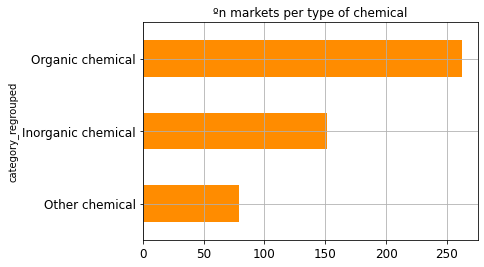

In [ ]:
# Grouping by 'category_regrouped' and ploting the size of each group on a barh plot (in one line)
internal_funcs.plot_categories(
    df_in=df_base_full_in_pubchem,
    groupby="category_regrouped",
    color="darkorange",
    fontsize=12,
)

In [ ]:
# Make df of METADATA, METHODS, and TL_METHODS for later export
df_metadata = pd.DataFrame(METADATA, columns=["METADATA"])
df_methods = pd.DataFrame(METHODS, columns=["METHODS"])
df_tl_methods = pd.DataFrame(TL_METHODS, columns=["TL_METHODS"])

# OUTPUTS: Export data to excel

In [ ]:
%%time

# Set output directory
outputs_dir = set_outputs_dir(use_default=True)  # default `..\data\interim`

## Export dataframe to excel
excelName = "data-full-only-in-pubchem.xlsx"

df_readme = make_readme_info(
    excelName,
    "Sheet1: Dataframe with columns as specified below, "
    "filtered only for chemicals found in PubChem database."
    "\nMETADATA: list of relevant metadata used in Sheet1."
    "\nMETHODS: list of LCIA methods used in Sheet1."
    "\nTL_METHODS: list of TL in PBs used in Sheet1."
    "\n[METHODS + METADATA + TL_METHODS have to be the only column labels in Sheet1]",
)

w_excel(
    path_to_file=outputs_dir,
    filename=excelName,
    dict_data_to_write={
        "Sheet1": df_base_full_in_pubchem,
        "METADATA": df_metadata,
        "METHODS": df_methods,
        "TL_METHODS": df_tl_methods,
    },
    readme_info=("readme", df_readme),
    #     ExcelWriter_kwargs={"engine": "openpyxl", "encoding": "UTF-8"}
    #     startrow=0
)

File: data-full-only-in-pubchem.xlsx successfully created in 
C:\Users\ViteksPC\Documents\00-ETH_projects\17-AESA_ecoinvent_chemicals\data\interim
Wall time: 886 ms
